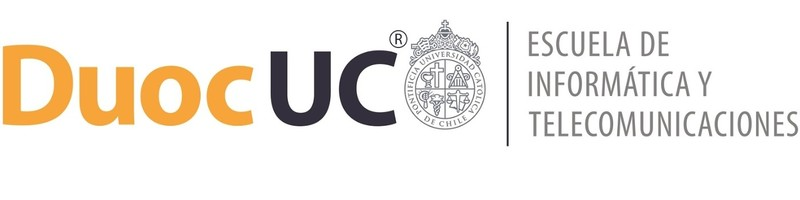

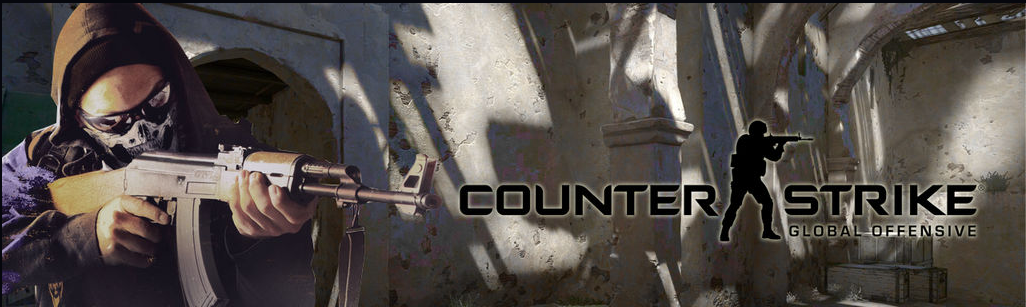

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Alvaro Flores, Aurora Mansilla, Ricardo Ojeda

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

# Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

# Objetivo del proyecto
El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

# Hipótesis
H1: A mayor valor de equipamiento inicial , mayor será el tiempo que un jugador sobrevive . Esto se va a extraer del tiempo de vida de los jugadores durante las partidas (regresión).

H2: El tipo de arma principal se relaciona con el tiempo de vida del jugador. Se hará un conteo de la probabilidad de supervivencia clasificando por el tipo de arma, así se realizará la comparación entre datos (clasificación).

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el dataset con separador ";"
df = pd.read_csv("csgo_ET2022.csv", sep=";")

# Vista general del dataset
print(f"") #----
print(df.shape)
print(f"") #----
print(df.columns)
print(f"") #----
df.head()
print(f"") #----
df.describe()

Saving csgo_ET2022.csv to csgo_ET2022.csv

(79157, 30)

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')




<ipython-input-1-9df70449d15e>:17: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_ET2022.csv", sep=";")


Unnamed: 0  InternalTeamId       MatchId       RoundId  \
count   79157.000000    79157.000000  79157.000000  79157.000000   
mean    60570.193640        1.500006    250.525033     12.765517   
std     36436.598386        0.500003    149.557804      7.432837   
min       600.000000        1.000000      4.000000      1.000000   
25%     30830.000000        1.000000    128.000000      6.000000   
50%     56720.000000        2.000000    236.000000     12.000000   
75%     90639.000000        2.000000    373.000000     19.000000   
max    123779.000000        2.000000    511.000000     36.000000   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
count           79157.000000              79157.000000         79157.000000   
mean                0.498667                  1.258057             0.675363   
std                 0.597985                  1.184909             0.464125   
min                 0.000000                  0.000000             0.000000   
25%                 0.000000                  0.000000             0.000000   
50%                 0.000000                  1.000000             1.000000   
75%                 1.000000                  2.000000             1.000000   
max                 4.000000                  6.000000             1.000000   

       PrimarySniperRifle  PrimaryHeavy    PrimarySMG  ...    RoundKills  \
count        79157.000000  79157.000000  79157.000000  ...  79157.000000   
mean             0.089840      0.005964      0.007046  ...      0.671349   
std              0.279797      0.075497      0.082453  ...      0.881798   
min              0.000000      0.000000      0.000000  ...      0.000000   
25%              0.000000      0.000000      0.000000  ...      0.000000   
50%              0.000000      0.000000      0.000000  ...      0.000000   
75%              0.000000      0.000000      0.000000  ...      1.000000   
max              1.000000      1.000000      1.000000  ...      5.000000   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
count  79157.000000    79157.000000     79157.000000   
mean       0.146178        0.301553         0.095633   
std        0.385601        0.578843         0.320641   
min        0.000000        0.000000         0.000000   
25%        0.000000        0.000000         0.000000   
50%        0.000000        0.000000         0.000000   
75%        0.000000        0.000000         0.000000   
max        4.000000        5.000000         5.000000   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue    MatchKills  \
count                 79157.000000                79157.000000  79157.000000   
mean                   3778.108695                18890.133532      8.511578   
std                    2111.285406                 9743.203024      6.195079   
min                       0.000000                    0.000000      0.000000   
25%                    1600.000000                10900.000000      3.000000   
50%                    4700.000000                22550.000000      8.000000   
75%                    5200.000000                26050.000000     13.000000   
max                    8850.000000                36150.000000     41.000000   

       MatchFlankKills  MatchAssists  MatchHeadshots  
count     79157.000000  79157.000000    79157.000000  
mean          1.209912      1.874831        3.858484  
std           1.435150      1.824027        3.246752  
min           0.000000      0.000000        0.000000  
25%           0.000000      0.000000        1.000000  
50%           1.000000      1.000000        3.000000  
75%           2.000000      3.000000        6.000000  
max          11.000000     14.000000       22.000000  

[8 rows x 21 columns]

In [ ]:
# Ver si hay valores nulos
df.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

# Fase 3: Data Preparation | Limpieza general

In [ ]:
# Copiar dataset original
df_clean = df[df["AbnormalMatch"] == False].copy()  # Eliminar partidas con error de red

# Limpiar y convertir TimeAlive a segundos (dividir por 1e14)
# NOTA: una ronda normal en CS:GO dura en promedio entre 15 y 155 segundos
df_clean["TimeAlive"] = df_clean["TimeAlive"].str.replace(".", "", regex=False)
df_clean["TimeAlive"] = pd.to_numeric(df_clean["TimeAlive"], errors="coerce") / 1e14

# Filtrar valores de TimeAlive fuera del rango normal de una ronda
df_clean = df_clean[(df_clean["TimeAlive"] >= 15) & (df_clean["TimeAlive"] <= 155)]

# Limpiar y convertir TravelledDistance (remover puntos y convertir a metros)
# NOTA: un jugador en CS:GO puede recorrer de 10 a 150 metros aprox.
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
df_clean["TravelledDistance"] = pd.to_numeric(df_clean["TravelledDistance"], errors="coerce") / 1e15

# Eliminar outliers en RoundStartingEquipmentValue usando IQR
Q1 = df_clean["RoundStartingEquipmentValue"].quantile(0.25)
Q3 = df_clean["RoundStartingEquipmentValue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean["RoundStartingEquipmentValue"] >= lower_bound) &
    (df_clean["RoundStartingEquipmentValue"] <= upper_bound)
]


In [ ]:
print(df_clean[["TimeAlive", "TravelledDistance"]].describe()) # revisamos cómo afectó esta limpieza a las columnas 'TimeAlive' y 'TravelledDistance'.

          TimeAlive  TravelledDistance
count  56214.000000       56214.000000
mean      75.080981          11.881881
std       27.673434          12.302108
min       15.033467           0.000000
25%       52.192211           5.462743
50%       74.951775           9.088984
75%       95.410775          13.355638
max      154.548722          65.530265


# Trabajo de limpieza sobre dato erróneo (Jugador 629)

In [ ]:
# Se analiza RoundWinner y MatchWinner en busca valores distintos y se pasan a booleano
print(df['RoundWinner'].unique())
print(df['MatchWinner'].unique())
nulos_matchwinner = df['MatchWinner'].isnull().sum()
print(f"Cantidad de valores NaN en MatchWinner: {nulos_matchwinner}")

['False' 'True' 'False4' True False]
[True False nan]
Cantidad de valores NaN en MatchWinner: 1


In [ ]:
df_clean = df_clean.rename(columns={'Unnamed: 0': 'id'})

In [ ]:
# Encontrar la fila donde se encuentra el valor 'False4'
errores_roundwinner = df_clean[df_clean['RoundWinner'] == 'False4']

# Mostrar las columnas afectadas
print(errores_roundwinner[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner']])

     id         Map  InternalTeamId  MatchId  RoundId RoundWinner
29  629  de_inferno               2        4        3      False4


In [ ]:
# Buscar todos los jugadores de MatchId=4 y RoundId=3 y las columnas afectadas
ronda_especifica = df_clean[
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3)
]
print(ronda_especifica[['id', 'InternalTeamId', 'RoundWinner']])

     id  InternalTeamId RoundWinner
21  621               1        True
22  622               1        True
24  624               1        True
25  625               2       False
26  626               2       False
27  627               2       False
28  628               2       False
29  629               2      False4


In [ ]:
# Se cambia dato de 'False4' por 'False' al jugador correspondiente.
df_clean.loc[
    (df_clean['id'] == 629) &
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3),
    'RoundWinner'
] = False

# Mapear los valores para corregir 'True' y 'False' como booleanos reales
df_clean['RoundWinner'] = df_clean['RoundWinner'].map({
    'True': True,
    'False': False,
    True: True,
    False: False
})

# Volver a listar los valores únicos de RoundWinner
print(df_clean['RoundWinner'].unique())

[False  True]


# Tratamiento de nulos

#### Previamente pudimos observar cómo habian datos nulos en las columnas 'Team' y 'MatchWinner'. Estos valores serán tratados a continuación:

In [ ]:
print(df_clean['MatchWinner'].unique())
print(df_clean['Team'].unique())

[True False nan]
['Terrorist' 'CounterTerrorist' nan]


In [ ]:
# Mostrar la fila que tiene MatchWinner nulo
fila_matchwinner_nulo = df_clean[df_clean['MatchWinner'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

print(f"")
# Mostrar las filas que tiene Team nulo
fila_matchwinner_nulo = df_clean[df_clean['Team'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId MatchWinner
29  629  de_inferno               2        4        3         NaN

     id         Map Team  InternalTeamId  MatchId  RoundId MatchWinner
13  613  de_inferno  NaN               1        4        2        True
27  627  de_inferno  NaN               2        4        3       False


## Tratamiento para el valor nulo en 'MatchWinner'
Previamente nos encontramos con el mismo jugador 629 el cual presentaba problemas de error de tipeo en un dato False.

Los datos que ahora tenemos para el tratamiento del nulo es:

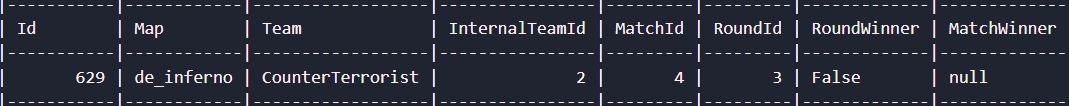

In [ ]:
# Filtrar todas las filas del MatchId 4
partida = df_clean[df_clean['MatchId'] == 4]

# Analizar qué equipo ganó más rondas
rondas_ganadas = partida.groupby('Team')['RoundWinner'].sum()

print(rondas_ganadas)

Team
CounterTerrorist    21
Terrorist           63
Name: RoundWinner, dtype: int64


In [ ]:
# Dado que el jugador 629 tiene como 'Team' CounterTerrorist ahora podemos agregar el valor correspondiente en 'MatchWinner', es decir, False
df_clean.loc[
    (df_clean['id'] == 629),
    'MatchWinner'
] = False

In [ ]:
# Verificamos los nuevos valores
print(df_clean.loc[(df_clean['id'] == 629) & (df_clean['MatchId'] == 4), ['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId  RoundWinner MatchWinner
29  629  de_inferno               2        4        3        False       False


# Tratamiento de valores nulos en 'Team'

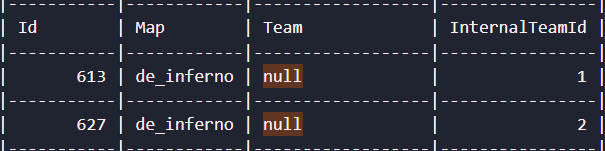

In [ ]:
# Mostrar las combinaciones únicas entre InternalTeamId y Team
combinaciones = df_clean[["MatchId", "InternalTeamId", "Team"]].drop_duplicates()
display(combinaciones.sort_values(["InternalTeamId", "Team"]))

# Contar cuántas veces cada InternalTeamId se asocia a cada Team
conteo = df_clean.groupby(["InternalTeamId", "Team"]).size().reset_index(name='Cantidad')
display(conteo.sort_values("InternalTeamId"))

# Verificar si dentro de una misma partida (MatchId) los equipos cambian su rol (T o CT)
cambio_en_partidas = df_clean.groupby(["MatchId", "InternalTeamId", "Team"]).size().reset_index(name='Recuento')
display(cambio_en_partidas.sort_values(["MatchId", "InternalTeamId"]))

# Identificar casos donde el mismo InternalTeamId se asocia a ambos bandos en distintas partidas
pivot = conteo.pivot(index="InternalTeamId", columns="Team", values="Cantidad")
display(pivot)

MatchId  InternalTeamId              Team
153          4               1  CounterTerrorist
343          6               1  CounterTerrorist
539          9               1  CounterTerrorist
783         10               1  CounterTerrorist
899         11               1  CounterTerrorist
...        ...             ...               ...
78032      505               2         Terrorist
78255      506               2         Terrorist
78692      509               2         Terrorist
78962      510               2         Terrorist
27           4               2               NaN

[1311 rows x 3 columns]

InternalTeamId              Team  Cantidad
0               1  CounterTerrorist     11015
1               1         Terrorist     17006
2               2  CounterTerrorist     17199
3               2         Terrorist     10992

MatchId  InternalTeamId              Team  Recuento
0           4               1  CounterTerrorist        32
1           4               1         Terrorist        52
2           4               2  CounterTerrorist        59
3           4               2         Terrorist        31
4           6               1  CounterTerrorist         4
...       ...             ...               ...       ...
1304      510               1         Terrorist        56
1305      510               2  CounterTerrorist        54
1306      510               2         Terrorist        47
1307      511               1         Terrorist        14
1308      511               2  CounterTerrorist        16

[1309 rows x 4 columns]

Team            CounterTerrorist  Terrorist
InternalTeamId                             
1                          11015      17006
2                          17199      10992

In [ ]:
# Filtramos los valores de matchid 510 donde internal team id 2 es terrorist y counterterrorist
filtered_df = df_clean[
    (df_clean['MatchId'] == 510) &
    (
        (df_clean['InternalTeamId'] == 2) &
        ((df_clean['Team'] == 'Terrorist') | (df_clean['Team'] == 'CounterTerrorist'))
    )
]

print(filtered_df[['MatchId', 'InternalTeamId', 'Team']])

       MatchId  InternalTeamId              Team
78812      510               2  CounterTerrorist
78814      510               2  CounterTerrorist
78815      510               2  CounterTerrorist
78816      510               2  CounterTerrorist
78822      510               2  CounterTerrorist
...        ...             ...               ...
79093      510               2         Terrorist
79094      510               2         Terrorist
79095      510               2         Terrorist
79096      510               2         Terrorist
79106      510               2         Terrorist

[101 rows x 3 columns]


## Justificación para imputación de valores nulos en Team

Durante el análisis del MatchId = 4, se identificaron dos jugadores con valores nulos en la columna Team, los cuales fueron imputados de forma razonada:

* **Jugador con Id = 627:**
A pesar de tener Team = NaN, comparte InternalTeamId = 2 con otros jugadores clasificados como "CounterTerrorist". Además, su valor de MatchKills = 2 y RoundKills = 1 sugiere que había participado en rondas previas. Comparando con el jugador Id = 617, que tiene las kills complementarias en la misma partida y equipo, se concluye que ambos registros corresponden al mismo jugador reconectado, validando así la imputación como "CounterTerrorist".

* **Jugador con Id = 613:**
Posee TeamStartingEquipmentValue = 1300, valor que comparte con otros cuatro jugadores clasificados como "Terrorist" en el mismo MatchId. Además, su InternalTeamId = 1 concuerda con el equipo Terrorist en dicha partida. Por lo tanto, se imputa razonablemente como "Terrorist".

Estas imputaciones permiten mantener la integridad de las variables categóricas sin introducir sesgo, apoyadas tanto por patrones de juego como por estadísticas internas del dataset.

In [ ]:
# Luego de todo el análisis podemos agregar los valores concordantes
df_clean.loc[
    (df_clean['id'] == 627),
    'Team'
] = 'CounterTerrorist'

df_clean.loc[
    (df_clean['id'] == 613),
    'Team'
] = 'Terrorist'

In [ ]:
# Verificar si hay valores nulos en las columnas 'Team' y 'MatchWinner' después de la limpieza
print("\nValores nulos después del tratamiento:")
print(df_clean[['Team', 'MatchWinner']].isnull().sum())


Valores nulos después del tratamiento:
Team           0
MatchWinner    0
dtype: int64


## Conclusión del análisis:
 El campo *InternalTeamId* puede asignarse tanto a *Terrorist* como a *CounterTerrorist*, según la partida (*MatchId*) y la ronda específica (*RoundId*).

 Por ejemplo, en el *MatchId = 510*, entre las rondas 1 a 15, *Terrorist = 1* y *CounterTerrorist = 2*, mientras que de la ronda 16 a la 30, los valores se invierten (*Terrorist = 2*, *CounterTerrorist = 1*). Por lo tanto, para un análisis preciso, es necesario contrastar este dato con otras columnas.


 #### **Recomendación:**
  A la hora de analizar los datos, resulta más conveniente y confiable utilizar el campo *Team* en lugar de *InternalTeamId*, ya que este último puede variar dentro de una misma partida, mientras que Team mantiene una asignación consistente (*Terrorist* o *CounterTerrorist*) sin depender de cambios internos.

# MODELO REGRESION LINEAL SIMPLE

In [ ]:
import statsmodels.api as sm

# Seleccionar variables

In [ ]:

X = df_clean['RoundStartingEquipmentValue']
y = df_clean['TimeAlive']

# Agregar constante (intercepto) para statsmodels
X = sm.add_constant(X)


# Entrenar el modelo de regresión lineal simple

In [ ]:
# Entrenar el modelo de regresión lineal simple
modelo = sm.OLS(y, X).fit()

# Mostrar resumen estadístico
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              TimeAlive   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1885.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:56:08   Log-Likelihood:            -2.6549e+05
No. Observations:               56214   AIC:                         5.310e+05
Df Residuals:                   56212   BIC:                         5.310e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Obtener predicciones del modelo
predicciones = modelo.fittedvalues

# Calcular MSE, RMSE y MAE
mse = mean_squared_error(y, predicciones)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predicciones)

# Mostrar resultados
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 740.96
RMSE: 27.22
MAE: 22.51


# Transformaciones logarítmicas

# Se aplica log(1 + x) al valor del equipamiento para:
Suavizar valores extremos (atenuar el impacto de valores muy altos).

Evitar problemas con log(0).

In [ ]:
df_clean["log_equipo"] = np.log1p(df_clean["RoundStartingEquipmentValue"])  # log(1+x) para evitar log(0)

# Reentrenar modelo con log_equipo
X_log = sm.add_constant(df_clean["log_equipo"])
modelo_log = sm.OLS(df_clean["TimeAlive"], X_log).fit()
print(modelo_log.summary())


                            OLS Regression Results                            
Dep. Variable:              TimeAlive   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2282.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:56:57   Log-Likelihood:            -2.6530e+05
No. Observations:               56214   AIC:                         5.306e+05
Df Residuals:                   56212   BIC:                         5.306e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9608      0.827     43.491      0.0

In [ ]:
predicciones_log = modelo_log.fittedvalues

mse_log = mean_squared_error(df_clean["TimeAlive"], predicciones_log)
rmse_log = np.sqrt(mse_log)
mae_log = mean_absolute_error(df_clean["TimeAlive"], predicciones_log)

print(f"[LOG] MSE: {mse_log:.2f}")
print(f"[LOG] RMSE: {rmse_log:.2f}")
print(f"[LOG] MAE: {mae_log:.2f}")


[LOG] MSE: 735.93
[LOG] RMSE: 27.13
[LOG] MAE: 22.42


# Dispersión y línea de regresión

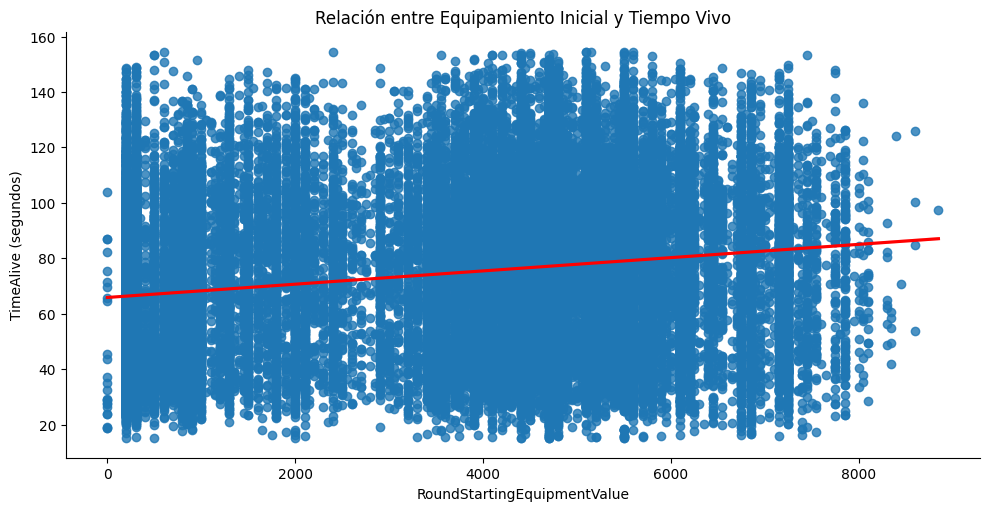

In [ ]:
sns.lmplot(
    x='RoundStartingEquipmentValue',
    y='TimeAlive',
    data=df_clean,
    line_kws={'color': 'red'},
    aspect=2
)
plt.title("Relación entre Equipamiento Inicial y Tiempo Vivo")
plt.xlabel("RoundStartingEquipmentValue")
plt.ylabel("TimeAlive (segundos)")
plt.show()


# Residuos vs predicciones (Homoscedasticidad)

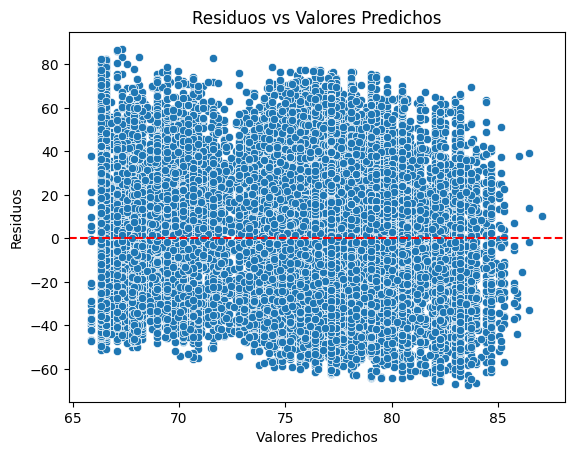

In [ ]:
residuos = modelo.resid
predicciones = modelo.fittedvalues

sns.scatterplot(x=predicciones, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores Predichos")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.show()



# QQ Plot (normalidad de residuos)

In [ ]:
sm.qqplot(residuos, line='s')
plt.title("QQ Plot de los Residuos")
plt.show()


# Histograma de residuos

In [ ]:
sns.histplot(residuos, kde=True, bins=30)
plt.title("Distribución de los Residuos")
plt.xlabel("Residuos")
plt.show()


# Evaluamos si el coeficiente será significativo y positivo.

Si lo es, confirmaremos la hipótesis. Si no, la rechazaremos.

In [ ]:
# Interpretación final
if modelo.pvalues[1] < 0.05 and modelo.params[1] > 0:
    print("Existe evidencia estadística para afirmar que a mayor equipamiento inicial, mayor es el tiempo de vida del jugador.")
else:
    print("No hay evidencia suficiente para afirmar la hipótesis planteada.")


Existe evidencia estadística para afirmar que a mayor equipamiento inicial, mayor es el tiempo de vida del jugador.


<ipython-input-28-dd0d2a838ec1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if modelo.pvalues[1] < 0.05 and modelo.params[1] > 0:


In [ ]:
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              TimeAlive   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1885.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:10:55   Log-Likelihood:            -2.6549e+05
No. Observations:               56214   AIC:                         5.310e+05
Df Residuals:                   56212   BIC:                         5.310e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             


# Diagnóstico del Modelo

# R-squared: 0.032 (3.2%)

Esto significa que solo el 3.2% de la variabilidad del tiempo que los jugadores permanecen vivos se puede explicar por el valor de equipamiento inicial.

Traducción práctica: el modelo casi no explica nada.
La relación es estadísticamente significativa (p-valor ≈ 0.000), pero prácticamente inútil para fines predictivos o estratégicos.

# Coeficiente: 0.0024

Por cada unidad de incremento en el RoundStartingEquipmentValue, el jugador vive 0.0024 segundos más.

Si alguien inicia con 1000 más de equipamiento,

# solo vive 2.4 segundos extra…

irrelevante en términos prácticos.

# Métricas de error (modelo sin transformación)

* **MSE**: 740.96
* **RMSE**: 27.22 segundos
* **MAE**: 22.51 segundos

Estos valores indican que el modelo tiene un error promedio de entre 22 y 27 segundos al predecir cuánto tiempo permanece vivo un jugador.
Dado que una ronda de CS\:GO tiene un máximo de 180 segundos (En una ronda estandar del CSGO), este margen de error es considerable.

# Modelo con transformación logarítmica (log(1 + x))

Se probó un segundo modelo aplicando logaritmo natural al valor de equipamiento inicial (log_equipo) para explorar si una relación no lineal mejoraba el ajuste.

* **MSE**: 735.93
* **RMSE**: 27.13 segundos
* **MAE**: 22.42 segundos

El modelo mejora levemente, pero la diferencia es prácticamente nula.
La transformación no cambia el hecho de que el valor de equipamiento inicial sigue siendo un **predictor débil** del tiempo de vida.

# Conclusión general

Aunque el modelo encuentra una relación estadísticamente significativa entre el equipamiento inicial y el tiempo de vida del jugador, esta relación es débil y de poca utilidad práctica.

El valor de equipamiento inicial, por sí solo, **no es un buen predictor**.
Factores como la posición del jugador, rol, economía del equipo contrario, tipo de arma o decisiones tácticas podrían tener mayor peso y deberían incluirse en modelos futuros.

